# RNA e Deep Learning - Aula 1

## Importando Bibliotecas

In [222]:
!pip install kagglehub[pandas-datasets] --quiet

In [223]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

## Carregando Dataset

In [224]:
dataset = "abhishek14398/salary-dataset-simple-linear-regression"
file_path = "Salary_dataset.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    dataset,
    file_path
)

/tmp/ipython-input-4007440236.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'salary-dataset-simple-linear-regression' dataset.


## Informações Sobre o Dataset

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [226]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [227]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## Separando features X e o alvo y, para Treino

A coluna Unnamed não parece relevante para o estudo e com isso dropada.


In [228]:
df.drop(columns=['Unnamed: 0'] ,inplace=True)
X = df[['YearsExperience']]
y = df['Salary']

Dividindo os dados em treino e teste (80/20)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

Instanciando Scaler

In [230]:
scaler = StandardScaler()

Transformando para Escalas Próximas

In [231]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Instanciando LinearRegression

In [232]:
model = LinearRegression()

## Treinando os Dados

In [233]:
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

## Avaliando o Score de Treino

In [234]:
r2_score(y_train, y_train_pred)

0.9645401573418148

Avaliando o Score de Teste

In [235]:
r2_score(y_test, y_test_pred)

0.9024461774180498

## Avaliação de Regressores

Função Para Printar Resultados de Erros

In [236]:
def print_metrics(y_test_in, y_test_pred_in):
  print("MEAN: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", mean_squared_error(y_test_in, y_test_pred_in)**2)
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

Treino

In [237]:
print_metrics(y_train, y_train_pred)

MEAN:  4221.0467344497365
MAPE:  0.0676546494564259
MSE:  27102249.731261354
RMSE:  734531940495656.1
R²:  0.9645401573418148


Teste

In [238]:
print_metrics(y_test, y_test_pred)

MEAN:  6286.453830757742
MAPE:  0.07744778459829138
MSE:  49830096.85590836
RMSE:  2483038552669208.0
R²:  0.9024461774180498


## Gráfico Da Regressão

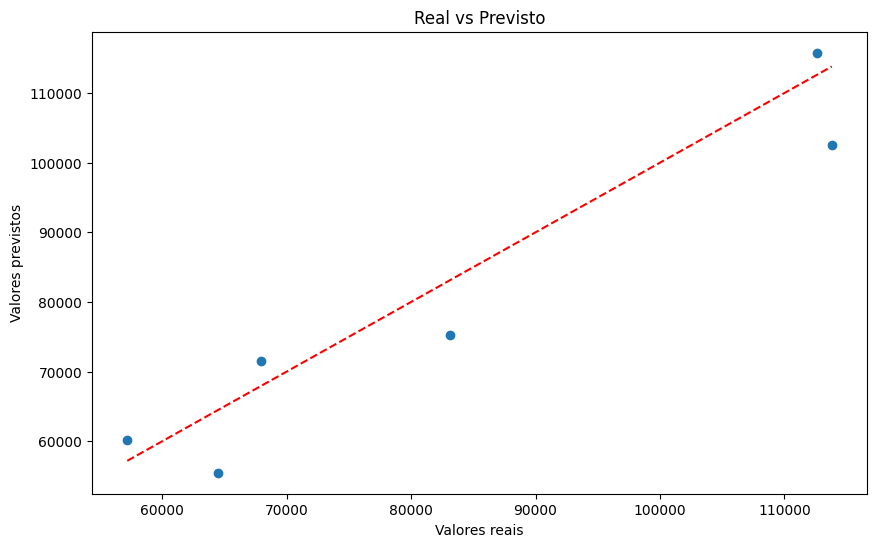

In [239]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reais")
plt.ylabel("Valores previstos")
plt.title("Real vs Previsto")
plt.show()

## Análise Sobre os Resultados

O modelo apresenta um erro médio absoluto percentual em torno de 7%, valor considerado bastante satisfatório para este tipo de análise.

O coeficiente de determinação obtido no conjunto de teste (R² ≈ 0,90) indica que aproximadamente 90% da variabilidade dos valores reais é explicada pelas variáveis independentes utilizadas no modelo.

No conjunto de treino, o R² é ligeiramente superior (0,96), porém ainda próximo do valor observado no teste, o que sugere uma boa capacidade de generalização e ausência de indícios relevantes de overfitting.

Embora o RMSE seja mais elevado no conjunto de teste — comportamento esperado —, ele permanece em um intervalo próximo ao obtido no treino, reforçando a consistência do desempenho do modelo.